# Data 512: Course Project (Part 2 - An Extension Plan)

The recent increase in wildfire incidents has raised significant concerns regarding the health and economic impacts on communities, particularly in urban areas like Vancouver, WA. 

Wildfires generate a complex mixture of harmful pollutants, primarily fine particulate matter (PM2.5), carbon monoxide, and volatile organic compounds, which can severely impact air quality. ​When these particles are inhaled, they penetrate deep into the lungs, leading to respiratory issues such as irritation of the airways, exacerbation of asthma, chronic bronchitis, and other lung diseases.​ Individuals with pre-existing conditions, children, and older adults are particularly vulnerable to these effects. Moreover, the smoke can trigger inflammatory responses in the respiratory system, making it even more difficult for affected individuals to breathe and increasing the likelihood of hospitalizations due to respiratory failure or other complications associated with poor air quality.

Wildfires contribute to unemployment, poverty, and premature deaths through multiple interconnected mechanisms.​ The destruction of homes and infrastructure leads to job losses in affected areas, particularly in sectors such as construction, tourism, and local businesses that struggle to recover from the economic fallout.  Additionally, prolonged smoke exposure results in adverse health outcomes, such as respiratory illnesses, which can increase healthcare costs and lead to greater absenteeism in the workforce.  This health impact further exacerbates poverty as affected individuals may face reduced earning capacity and increased financial burdens due to medical expenses.  Finally, the combined stress of economic instability and health complications can lead to premature deaths among vulnerable populations, including the elderly and those with pre-existing conditions.

In this part, we aim to understand how smoke from wildfires affects respiratory health outcomes, hospitalization rates, and the economic stability of local industries. By focusing on this issue, we seek to provide valuable insights that can facilitate community preparedness, enhance public health responses, and inform city officials about necessary interventions. The goal is to learn about the relationship between increased smoke exposure and its potential consequences on community health and economic activity.

This is the first step of Part 3/4. In this notebook, 
- We will explore the use of supplementary datasets to support our analysis of the impacts of wildfire smoke in Vancouver, WA. We will also visualize these datasets to identify and understand their trends.
- Additionally, during the grading of my Part-1 (common analysis) by the TA, Meena, suggested filtering the AQI data to the fire season before comparing it with the smoke estimate (which was already filtered for the fire season). I will incorporate this step towards the end of the analysis and compare it to the smoke estimate.

## 1. Import required libraries

In [33]:
# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt

# for comparing Smoke estimate with AQI values
from scipy.stats import spearmanr

# to supress warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Dataset - WA: Respiratory Disease Mortality (IHME)

This dataset provides information on mortality rates due to various respiratory diseases in Clark County, which includes Vancouver.
- **Description:** Contains data related to various respiratory conditions, categorized by cause and sex for years: 1980 to 2014. The dataset can be accessed from here: [link](https://ghdx.healthdata.org/record/ihme-data/united-states-chronic-respiratory-disease-mortality-rates-county-1980-2014) and can be further filtered to obtain Clark County, WA. 
- **Columns:** "measure_id", "measure_name", "location_id", "location_name", "FIPS", "cause_id", "cause_name", "sex_id", "sex", "age_id", "age_name", "year_id", "metric", "mx", "lower", "upper"
- **Access:** The dataset is available in a CSV format. The terms and conditions for using the data from the Institute for Health Metrics and Evaluation (IHME) are governed by the IHME FREE-OF-CHARGE [NON-COMMERCIAL USER AGREEMENT](https://www.healthdata.org/Data-tools-practices/data-practices/ihme-free-charge-non-commercial-user-agreement).​ Users are permitted to use, share, modify, or build upon the data for non-commercial purposes. For inquiries related to commercial use, it is advised to refer to the [IHME Terms and Conditions](https://www.healthdata.org/data-tools-practices/data-practices/terms-and-conditions).  For detailed information, it is recommended to consult the [IHME website](https://ghdx.healthdata.org/contact) directly.


In [2]:
# load the downloaded dataset
mortality = pd.read_csv("../data/input_data/healthcare_data/IHME_Respiratory_Disease_Mortality_Washington.CSV")
mortality.head()

,measure_id,measure_name,location_id,location_name,FIPS,cause_id,cause_name,sex_id,sex,age_id,age_name,year_id,metric,mx,lower,upper
0,1,Deaths,570,Washington,53,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1980,Rate,73.347522,70.814541,75.823906
1,1,Deaths,570,Washington,53,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1981,Rate,73.412468,70.983364,75.920630
2,1,Deaths,570,Washington,53,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1982,Rate,72.933100,70.534293,75.259102
3,1,Deaths,570,Washington,53,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1983,Rate,73.322175,71.014651,75.555851
4,1,Deaths,570,Washington,53,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1984,Rate,73.172945,70.886086,75.385452


In [3]:
# get the details of Clark County
mortality_clark = mortality[mortality["location_name"] == "Clark County"]
mortality_clark.head()

,measure_id,measure_name,location_id,location_name,FIPS,cause_id,cause_name,sex_id,sex,age_id,age_name,year_id,metric,mx,lower,upper
630,1,Deaths,3563,Clark County,53011,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1980,Rate,74.559587,69.693866,79.623905
631,1,Deaths,3563,Clark County,53011,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1981,Rate,74.855265,70.095372,79.838698
632,1,Deaths,3563,Clark County,53011,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1982,Rate,74.373864,69.668210,79.110574
633,1,Deaths,3563,Clark County,53011,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1983,Rate,73.004129,68.661227,77.685383
634,1,Deaths,3563,Clark County,53011,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1984,Rate,75.848903,71.451555,80.311738


In [4]:
mortality_clark.describe()

,measure_id,location_id,FIPS,cause_id,sex_id,age_id,year_id,mx,lower,upper
count,1050.0,1050.0,1050.0,1050.00000,1050.000000,1050.0,1050.000000,1050.000000,1050.000000,1050.000000
mean,1.0,3563.0,53011.0,512.80000,2.000000,27.0,1997.000000,11.421866,10.569457,12.329644
std,0.0,0.0,0.0,3.43092,0.816886,0.0,10.104318,21.457270,20.332929,22.620581
min,1.0,3563.0,53011.0,508.00000,1.000000,27.0,1980.000000,0.001719,0.000164,0.005368
25%,1.0,3563.0,53011.0,510.00000,1.000000,27.0,1988.000000,0.093619,0.035066,0.153740
50%,1.0,3563.0,53011.0,512.50000,2.000000,27.0,1997.000000,0.584727,0.382116,0.814984
75%,1.0,3563.0,53011.0,515.00000,3.000000,27.0,2006.000000,5.211412,3.479449,7.001900
max,1.0,3563.0,53011.0,520.00000,3.000000,27.0,2014.000000,76.747887,72.484230,81.542869


It looks like we have havrious cause names and sex. Let us check them once.

In [5]:
print("Cause Names:\n", mortality_clark["cause_name"].unique())
print("\nSex:\n", mortality_clark["sex"].unique())

Cause Names:
 ['Chronic respiratory diseases' 'Chronic obstructive pulmonary disease'
 'Pneumoconiosis' 'Silicosis' 'Asbestosis' 'Coal workers pneumoconiosis'
 'Other pneumoconiosis' 'Asthma'
 'Interstitial lung disease and pulmonary sarcoidosis'
 'Other chronic respiratory diseases']

Sex:
 ['Male' 'Female' 'Both']


We have various the causes divided into different health issues and sex categorized to Male, Female, (and a sum of both)

Let us once visualize the same for a particular cause over time and decide if will be useful.

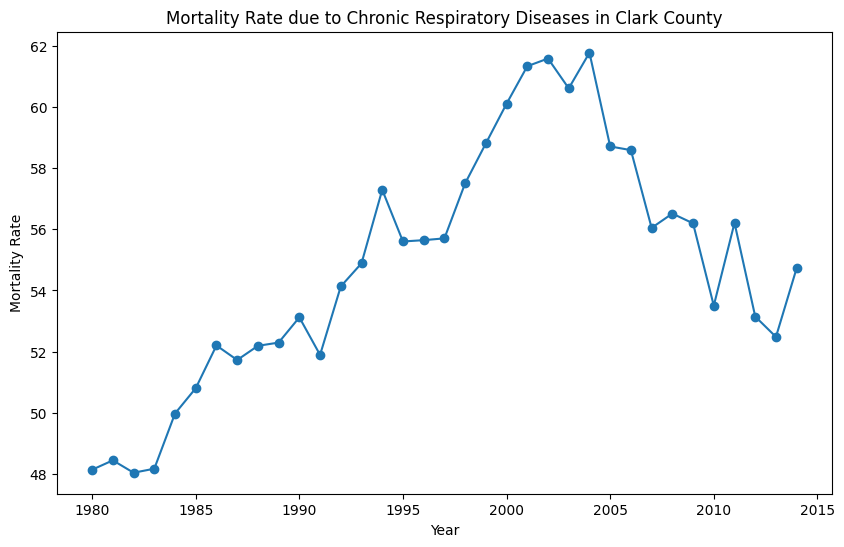

In [6]:
# Mortality Rate due to Chronic Respiratory Diseases in Clark County
subset = mortality_clark[(mortality_clark["cause_name"] == "Chronic respiratory diseases") 
                         & (mortality_clark["sex"] == "Both")]

plt.figure(figsize=(10, 6))
plt.plot(subset["year_id"], subset["mx"], marker="o")
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate due to Chronic Respiratory Diseases in Clark County")
plt.show()

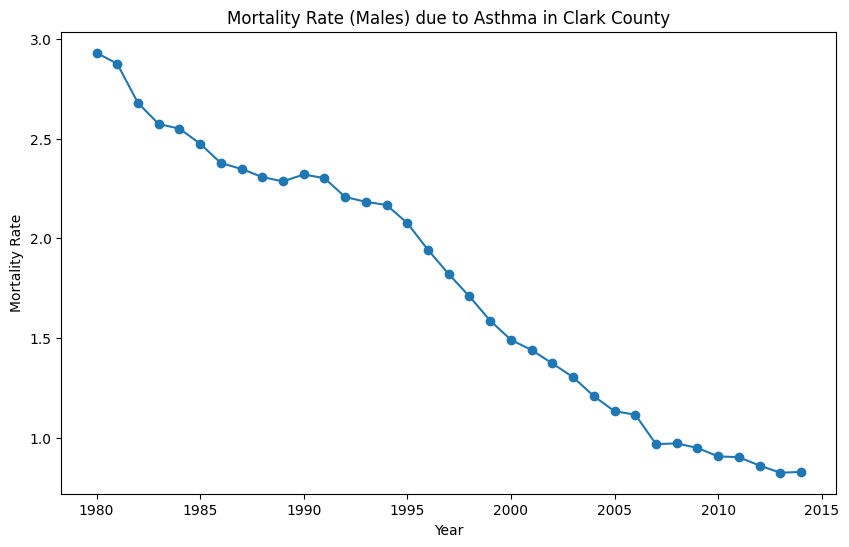

In [7]:
# Mortality Rate (Males) due to Asthma in Clark County
subset = mortality_clark[(mortality_clark["cause_name"] == "Asthma") 
                         & (mortality_clark["sex"] == "Male")]

plt.figure(figsize=(10, 6))
plt.plot(subset["year_id"], subset["mx"], marker="o")
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate (Males) due to Asthma in Clark County")
plt.show()

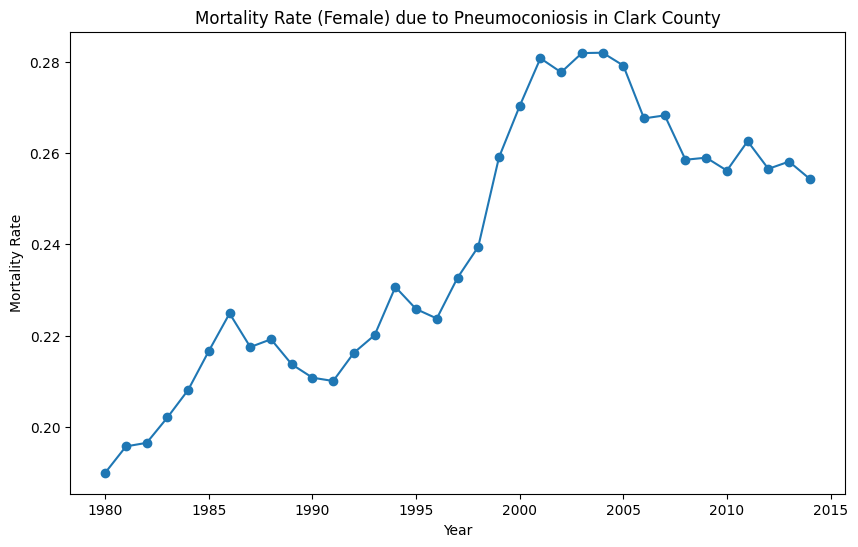

In [8]:
# Mortality Rate (Female) due to Pneumoconiosis in Clark County
subset = mortality_clark[(mortality_clark["cause_name"] == "Pneumoconiosis") 
                         & (mortality_clark["sex"] == "Female")]

plt.figure(figsize=(10, 6))
plt.plot(subset["year_id"], subset["mx"], marker="o")
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate (Female) due to Pneumoconiosis in Clark County")
plt.show()

## 3. Dataset - Clark County, WA: Unemployment Rate (FRED Economic Data)

Data from the Federal Reserve Bank of St. Louis Economic Data (FRED) that covers unemployment rates and economic activity in Clark County.
- **Description:** This dataset includes time series data on unemployment rates (years: 1990 - 2024), which can be correlated with smoke events and economic downturns. The dataset can be accessed from here: [link](https://fred.stlouisfed.org/series/WACLAR1URN)
- **Columns:** "DATE”, “WACLAR1URN"
- **Access:** The dataset is available in a CSV format and can be used freely.​ The data is available for public access without any subscription or payment required. When using the data, proper citation of the source is encouraged. It is important to credit FRED as the source of the data. Users are mainly encouraged to use the data for non-commercial purposes. FRED data is typically released under a Creative Commons license which allows for use, sharing, modification, and adaptation as long as appropriate credit is given. For detailed terms, refer to the [FRED website](https://fredhelp.stlouisfed.org/fred/graphs/share-my-fred-graph/cite/).


In [9]:
unemployment = pd.read_csv("../data/input_data/socioeconomic_data/FRED_Unemployment_rate_Clark_County.csv")
unemployment.head()

,DATE,WACLAR1URN
0,1990-01-01,5.0
1,1990-02-01,5.8
2,1990-03-01,5.1
3,1990-04-01,4.8
4,1990-05-01,4.5


In [10]:
# rename columns for better readability
unemployment.rename(columns={"WACLAR1URN": "unemployment_rate"}, inplace=True)

# get year from date
unemployment["DATE"] = pd.to_datetime(unemployment["DATE"])
unemployment["year"] = unemployment["DATE"].dt.year
unemployment.drop("DATE", axis=1, inplace=True)

unemployment.head()

,unemployment_rate,year
0,5.0,1990
1,5.8,1990
2,5.1,1990
3,4.8,1990
4,4.5,1990


group by and get the mean unemployment rate for each year

In [11]:
grouped_unemployment = unemployment.groupby("year")["unemployment_rate"].mean().reset_index()
grouped_unemployment.head()

,year,unemployment_rate
0,1990,4.683333
1,1991,6.158333
2,1992,7.033333
3,1993,5.866667
4,1994,4.591667


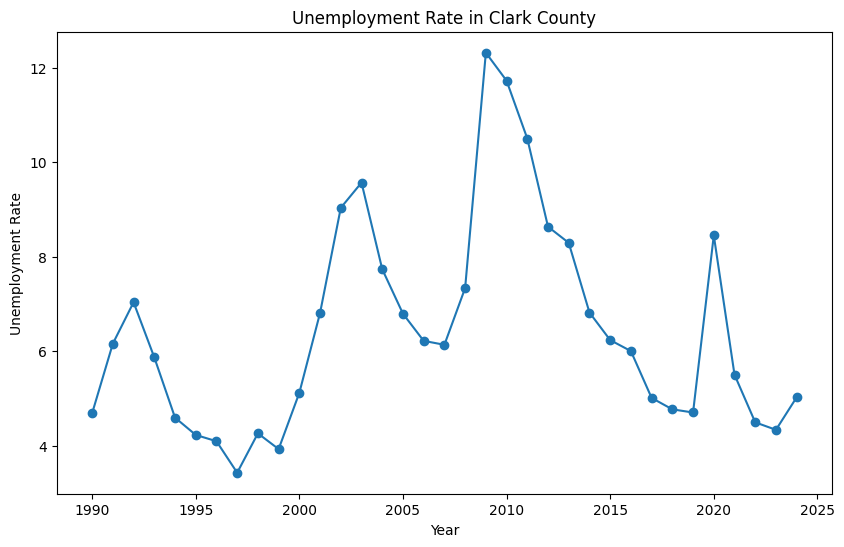

In [12]:
# Unemployment Rate in Clark County
plt.figure(figsize=(10, 6))

plt.plot(grouped_unemployment["year"], grouped_unemployment["unemployment_rate"], marker="o")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment Rate in Clark County")
plt.show()

## 4. Dataset - Clark County, WA: Poverty Rate (FRED Economic Data)
Data from the Federal Reserve Bank of St. Louis Economic Data (FRED) that covers poverty rates (age 0-17) and economic activity in Clark County.
- **Description:** This dataset includes time series data on poverty rates (years: 1989-2022), which can be correlated with smoke events and economic downturns. The dataset can be accessed from here: [link](https://fred.stlouisfed.org/series/PPU18WA53011A156NCEN)
- **Columns:** "DATE”, “PPU18WA53011A156NCEN"
- **Access:** The dataset is available in a CSV format and can be used freely.​ The data is available for public access without any subscription or payment required. When using the data, proper citation of the source is encouraged. It is important to credit FRED as the source of the data. Users are mainly encouraged to use the data for non-commercial purposes. FRED data is typically released under a Creative Commons license which allows for use, sharing, modification, and adaptation as long as appropriate credit is given. For detailed terms, refer to the [FRED website](https://fredhelp.stlouisfed.org/fred/graphs/share-my-fred-graph/cite/).

In [13]:
poverty = pd.read_csv("../data/input_data/socioeconomic_data/FRED_Poverty_Clark_County.csv")
poverty.head()

,DATE,PPU18WA53011A156NCEN
0,1989-01-01,15.5
1,1990-01-01,.
2,1991-01-01,.
3,1992-01-01,.
4,1993-01-01,15.4


In [14]:
# rename columns for better readability
poverty.rename(columns={"PPU18WA53011A156NCEN": "poverty_rate"}, inplace=True)

# handle missing values
poverty["poverty_rate"] = poverty["poverty_rate"].replace('.', np.nan)
poverty = poverty.dropna()
poverty["poverty_rate"] = pd.to_numeric(poverty["poverty_rate"], errors='coerce')

# get year from date
poverty["DATE"] = pd.to_datetime(poverty["DATE"])
poverty["year"] = poverty["DATE"].dt.year
poverty.drop("DATE", axis=1, inplace=True)

poverty.head()

,poverty_rate,year
0,15.5,1989
4,15.4,1993
6,13.0,1995
8,13.5,1997
9,12.2,1998


In [15]:
# group the rate by year
grouped_poverty = poverty.groupby("year")["poverty_rate"].mean().reset_index()
grouped_poverty.head()

,year,poverty_rate
0,1989,15.5
1,1993,15.4
2,1995,13.0
3,1997,13.5
4,1998,12.2


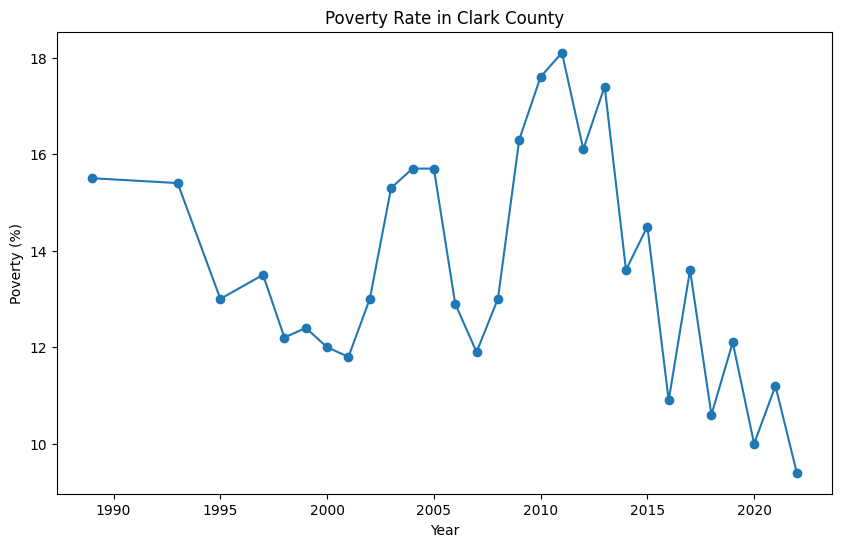

In [16]:
# plot poverty rate in Clark county
plt.figure(figsize=(10, 6))

plt.plot(grouped_poverty["year"], grouped_poverty["poverty_rate"], marker="o")
plt.xlabel("Year")
plt.ylabel("Poverty (%)")
plt.title("Poverty Rate in Clark County")
plt.show()

## 5. Dataset - Clark County, WA: Premature Deaths (FRED Economic Data)
Data from the Federal Reserve Bank of St. Louis Economic Data (FRED) that covers premature death rates in Clark County.
- **Description:** This dataset includes time series data on premature death rates, which can be correlated with smoke events and economic downturns. The dataset can be accessed from here: [link](https://fred.stlouisfed.org/series/CDC20N2UAA053011)
- **Columns:** "DATE”, “CDC20N2U053011"
- **Access:** The dataset is available in a CSV format and can be used freely.​ The data is available for public access without any subscription or payment required. When using the data, proper citation of the source is encouraged. It is important to credit FRED as the source of the data. Users are mainly encouraged to use the data for non-commercial purposes. FRED data is typically released under a Creative Commons license which allows for use, sharing, modification, and adaptation as long as appropriate credit is given. For detailed terms, refer to the [FRED website](https://fredhelp.stlouisfed.org/fred/graphs/share-my-fred-graph/cite/).

In [17]:
premature_deaths = pd.read_csv("../data/input_data/socioeconomic_data/FRED_Premature_Deaths_Clark_County.csv")
premature_deaths.head()

,DATE,CDC20N2U053011
0,1999-01-01,300.5
1,2000-01-01,314.4
2,2001-01-01,299.1
3,2002-01-01,311.1
4,2003-01-01,298.1


In [18]:
# rename columns for better readability
premature_deaths.rename(columns={"CDC20N2U053011": "death_rate_per_100k"}, inplace=True)

# get year from date
premature_deaths["DATE"] = pd.to_datetime(premature_deaths["DATE"])
premature_deaths["year"] = premature_deaths["DATE"].dt.year
premature_deaths.drop("DATE", axis=1, inplace=True)

premature_deaths.head()

,death_rate_per_100k,year
0,300.5,1999
1,314.4,2000
2,299.1,2001
3,311.1,2002
4,298.1,2003


In [19]:
# group the rate by year
grouped_premature_deaths = premature_deaths.groupby("year")["death_rate_per_100k"].mean().reset_index()
grouped_premature_deaths.head()

,year,death_rate_per_100k
0,1999,300.5
1,2000,314.4
2,2001,299.1
3,2002,311.1
4,2003,298.1


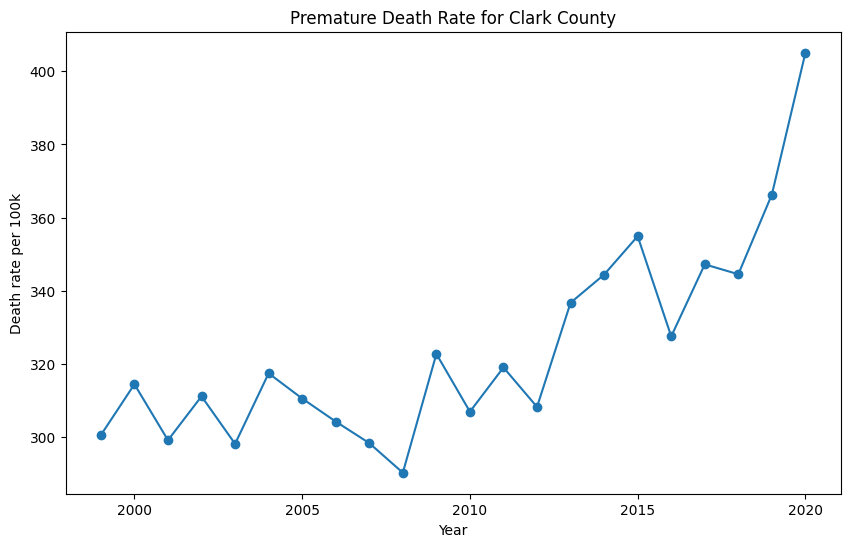

In [20]:
# plot Premature Death Rate for Clark County
plt.figure(figsize=(10, 6))

plt.plot(grouped_premature_deaths["year"], grouped_premature_deaths["death_rate_per_100k"], marker="o")
plt.xlabel("Year")
plt.ylabel("Death rate per 100k")
plt.title("Premature Death Rate for Clark County")
plt.show()

## 6. Filter AQI dataset for the fire season alone

In [ ]:
# load the AQI dataset
aqi_df = pd.read_csv("../data/input_data/AQI_data/aqi_data_grouped_by_date.csv")
aqi_df.drop("Unnamed: 0", axis=1, inplace=True)
aqi_df.head()

,date,AQI
0,1990-02-04,38.0
1,1990-02-10,35.0
2,1990-02-16,41.0
3,1990-02-22,48.0
4,1990-02-28,33.0


According to the instructions, the smoke estimate should adhere to the following conditions:
- Defines the annual fire season as running from May 1st through October 31st.

We will have filter the AQI data as well for the fire season now.

In [23]:
# obtain the month from date
aqi_df['date'] = pd.to_datetime(aqi_df['date'])
aqi_df['month'] = aqi_df['date'].dt.month

# Filter to have data between the months of May - October
filtered_aqi_df = aqi_df[(aqi_df["month"] >= 5.0) & 
                        (aqi_df["month"] <= 10.0)]

print(filtered_aqi_df.shape)
filtered_aqi_df.head()

(4709, 3)


,date,AQI,month
15,1990-05-05,56.0,5
16,1990-05-11,44.5,5
17,1990-05-17,36.5,5
18,1990-05-23,72.5,5
19,1990-05-29,101.5,5


We will be comparing the AQI data with the smoke estimate. Since we have grouped our smoke estimate data by year, we will do the same for AQI values as well. I am getting the mean AQI values.

Further, I am saving the dataset for future reference.

In [24]:
# get the year from date
filtered_aqi_df['year'] = filtered_aqi_df['date'].dt.year 

# group by 'year' and calculate the mean AQI
filtered_aqi_df = filtered_aqi_df.groupby('year')['AQI'].mean().reset_index() 

filtered_aqi_df.head()

,year,AQI
0,1990,64.661290
1,1991,53.218750
2,1992,56.166667
3,1993,48.209677
4,1994,43.193548


In [26]:
# save the dataframe for future reference
filtered_aqi_df.to_csv("../data/input_data/AQI_data/filtered_fire_season_aqi_data_grouped_by_year.csv")

## 7. Compare the estimated smoke impact to AQI

We will now compare the wildfire smoke estimates with the filtered AQI dataset to assess any significant changes relative to the Part-1 analysis, focusing specifically on the fire season.

First let us load the wildfire smoke dataset amd merge it with the AQI data.

In [ ]:
# load the smoke estimate dataset
filtered_smoke_df = pd.read_csv("../data/input_data/wildfire-smoke-estimate_data/wildfire_dataset_with_distance_and_smoke_estimate_by_year.csv")
filtered_smoke_df.drop("Unnamed: 0", axis=1, inplace=True)
filtered_smoke_df.head()

,year,smoke_estimate_scaled,Mean_GIS_SqMiles,Mean_average_distance
0,1961,5.704264,2.112677,430.484837
1,1962,2.064932,0.839785,475.337610
2,1963,7.274286,2.346199,401.233279
3,1964,5.476086,2.354631,360.510278
4,1965,2.190371,0.954739,454.041410


In [31]:
# merge the daatsets by year
smoke_aqi_df = pd.merge(filtered_smoke_df, filtered_aqi_df, on='year')
display(smoke_aqi_df)

,year,smoke_estimate_scaled,Mean_GIS_SqMiles,Mean_average_distance,AQI
0,1990,7.412804,2.250458,355.356059,64.661290
1,1991,4.301184,1.193496,339.093160,53.218750
2,1992,9.453330,3.293378,382.160408,56.166667
3,1993,1.458284,0.441502,315.302579,48.209677
4,1994,16.492413,4.875427,371.578427,43.193548
5,1995,5.716198,2.459122,416.449250,42.548387
6,1996,17.346514,6.047522,391.610381,44.596774
7,1997,3.362726,0.852566,374.088528,53.937500
8,1998,5.413723,1.812621,371.256655,49.550000
9,1999,15.921199,6.589946,409.592637,49.293084


Next let us plot and compare.

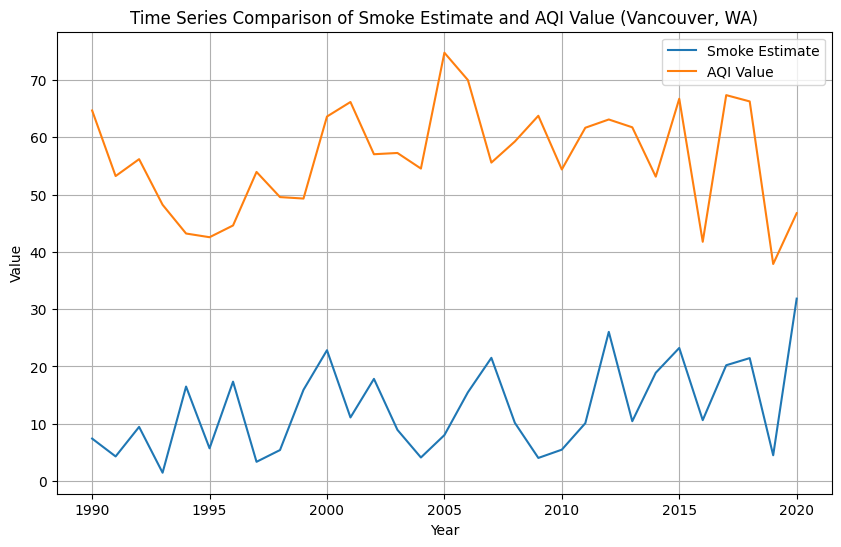

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(smoke_aqi_df['year'], smoke_aqi_df['smoke_estimate_scaled'], label='Smoke Estimate')
plt.plot(smoke_aqi_df['year'], smoke_aqi_df['AQI'], label='AQI Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Time Series Comparison of Smoke Estimate and AQI Value (Vancouver, WA)')
plt.grid()
plt.legend()
plt.show()

I am not able to say how similar are both the values. I thought maybe I will see how well they are correlated with each other.

In [34]:
# Calculate Spearman correlation
spearman_corr, p_value = spearmanr(smoke_aqi_df['smoke_estimate_scaled'], smoke_aqi_df['AQI'])
print("Spearman Correlation between Smoke Estimate and AQI: ", spearman_corr)
print("P-value: ", p_value)

Spearman Correlation between Smoke Estimate and AQI:  0.23588709677419356
P-value:  0.2014221271478866


The Spearman correlation coefficient between the Smoke Estimate and the Air Quality Index (AQI) is ~0.236. This indicates a weak positive correlation, suggesting that as the Smoke Estimate increases, the AQI tends to increase slightly, but the relationship is not strong. The p-value of ~0.2 suggests that this correlation is not statistically significant, indicating that we cannot confidently reject the null hypothesis that there is no correlation between the two measures.

This observation closely aligns with the findings from Part-1 (Common Analysis). Therefore, it suggests that filtering the AQI data to exclude the non-fire season has minimal impact on the estimated smoke-related effects.

In the next step/notebook, we will aim to understand how smoke from wildfires affects respiratory health outcomes, hospitalization rates, and the economic stability of local industries.